In [37]:
# 1. fitting it to the periodic function
#defining periodic function
from scipy import optimize
import builtins
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))
#identifying the curve for plot using scipy
months = [1,2,3,4,5,6,7,8,9,10,11,12]
temp_max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
temp_min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [40, 20,0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20,0])
print(res_max)
print(res_min)

[ 38.31897591 -11.40523793   1.73212149]
[24.2013286  -8.13512334  1.17137919]


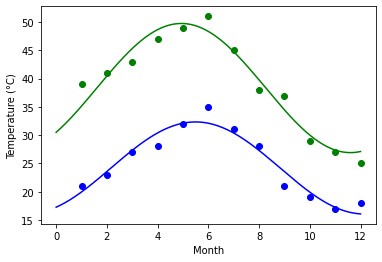

In [43]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months,temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'g-')
plt.plot(months,temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

In [45]:
import pandas as pd
url= "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [46]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [47]:
s=round((titanic['sex'].value_counts())/len(titanic)*100,2)
pd.DataFrame(s)

,sex
male,64.35
female,35.57


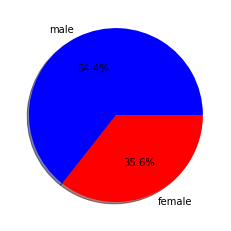

In [48]:
labels = ['male','female']
sizes = titanic.sex.value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors = ['Blue'
,'Red'])
#ax1.axis('equal')
plt.show()


<AxesSubplot:xlabel='age', ylabel='fare'>

<Figure size 432x288 with 0 Axes>

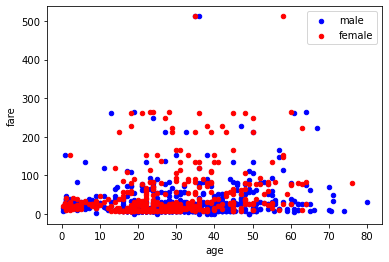

In [51]:
plt.figure()
category1 = titanic[titanic.sex=='male'].plot.scatter('age', 'fare', color='blue',label='male')
titanic[titanic.sex=='female'].plot.scatter('age', 'fare',color='red',label='female',ax=category1)